In [ ]:
import argparse
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import data_loader, model_builder
from trainer import Trainer, train
import data_saver

from tensorflow.compat.v1 import ConfigProto

config = ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Create dataset
image_shape = (64, 64, 3)
batch_size=16
dataset = data_loader.ImageDataset(
                            image_width=image_shape[0],
                            image_height=image_shape[1])
batches = data_loader.dataset_to_batches(dataset,
                            batch_size=batch_size,
                            prefetch_size=5)

In [ ]:
# Create models
generator, discriminator, full = model_builder.get_models(image_shape)

In [ ]:
# Create output directories
postfix = datetime.datetime.now().strftime("%m-%d-%H-%M-%S")
def get_dirs(postfix):
    dirs = []
    for name in ['images', 'logs', 'weights']:
        dir = os.path.join(name, postfix)
        dirs.append(dir)
        if not os.path.exists(dir):
            os.makedirs(dir)
    return dirs
image_dir, log_dir, weights_dir = get_dirs(postfix)
print(postfix)

In [ ]:
trainer = Trainer(batches, generator, discriminator, full, batch_size, log_dir)

In [ ]:
for i in range(10000):
    print('---------{}----------'.format(i))
    trainer.train_discriminator(10)
    trainer.train_generator(100)
    if i % 1000 == 0:
        generator.save_weights('sgenerator_{}.h5'.format(i))
        discriminator.save_weights('sdiscriminator_{}.h5'.format(i))
        full.save_weights('sfull_{}.h5'.format(i))
        with open('sgenerator_{}.json'.format(i), 'w') as f:
            f.write(generator.to_json())
        with open('sdiscriminator_{}.json'.format(i), 'w') as f:
            f.write(discriminator.to_json())
        with open('sfull_{}.json'.format(i), 'w') as f:
            f.write(full.to_json())

In [ ]:
image_saver = data_saver.ImageSaver(image_dir + '/phase3000')
images, masks, masked_images = next(batches)
generated_images = generator.predict([images, masks])
for i in range(batch_size):
    plt.imshow(generated_images[i])
    plt.show()
    image_saver.save_image('{}.jpg'.format(i), generated_images[i])

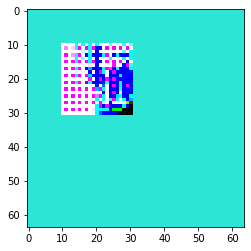

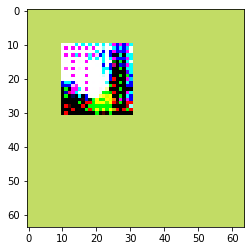

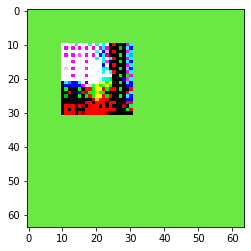

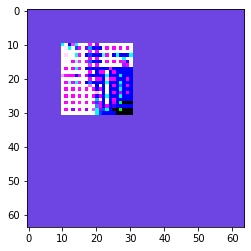

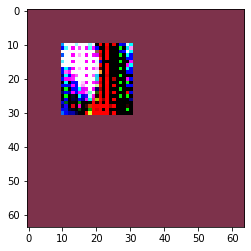

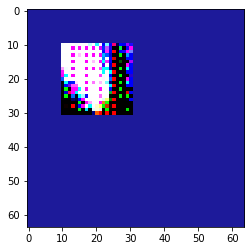

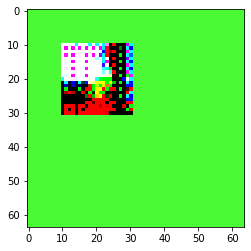

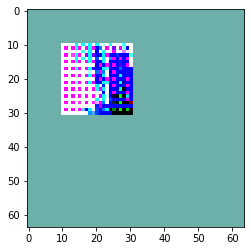

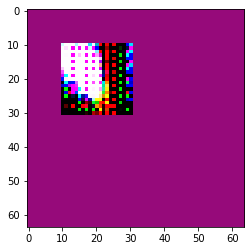

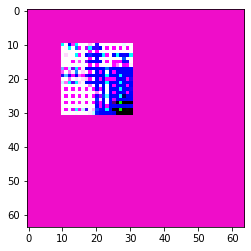

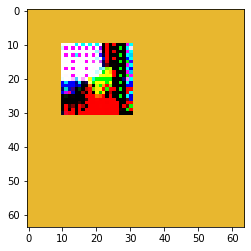

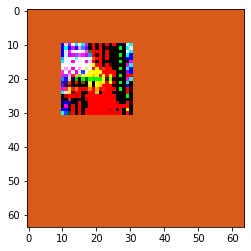

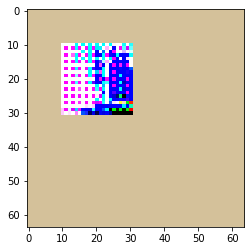

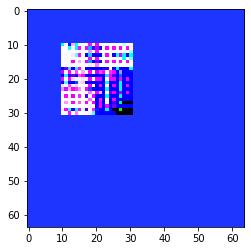

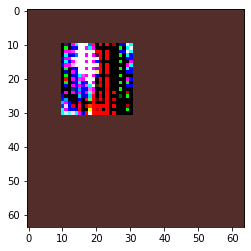

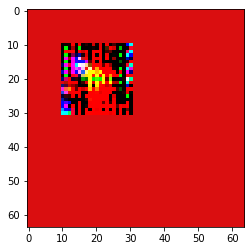

In [41]:
image_saver = data_saver.ImageSaver(image_dir + '/phase3000')
images, masks, masked_images = next(batches)
generated_images = generator.predict([images, masks])
for i in range(batch_size):
#     plt.imshow(images[i])
#     plt.show()
#     plt.imshow(masked_images[i])
#     plt.show()
    plt.imshow(generated_images[i])
    plt.show()
    image_saver.save_image('{}.jpg'.format(i), generated_images[i])